## **Importing the necessary libraries and overview of the dataset**

Let's start by mounting the required Libraries and the Dataset.

In [21]:
# pip install surprise

In [3]:
# Used to ignore the warning given as output of the code
import warnings                                 
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np                              
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt     

# Slightly advanced library for data visualization            
import seaborn as sns                           

# A dictionary output that does not raise a key error
from collections import defaultdict             

# A performance metrics in surprise
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# for model tuning model hyper-parameters
from surprise.model_selection import GridSearchCV

# for splitting the rating data in train and test dataset
from surprise.model_selection import train_test_split

# for implementing similarity based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# for implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing cross validation
from surprise.model_selection import KFold

In [4]:
# Import the dataset
# rating = pd.read_csv('/Data/ratings.csv')
rating = pd.read_csv('Data/ratings.csv') # 

Let's check the **info** of the data

In [5]:
rating.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


- There are **1,00,004 observations** and **4 columns** in the data
- All the columns are of **numeric data type**
- The data type of the timestamp column is int64 which is not correct. We can convert this to DateTime format but **we don't need timestamp for our analysis**. Hence, **we can drop this column**

In [7]:
# Dropping timestamp column
rating = rating.drop(['timestamp'], axis=1)

In [8]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100004 non-null  int64  
 1   movieId  100004 non-null  int64  
 2   rating   100004 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


## **Exploring the dataset**

Let's explore the dataset and answer some basic data-related questions:

In [9]:
# Printing the top 5 rows of the dataset
rating.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


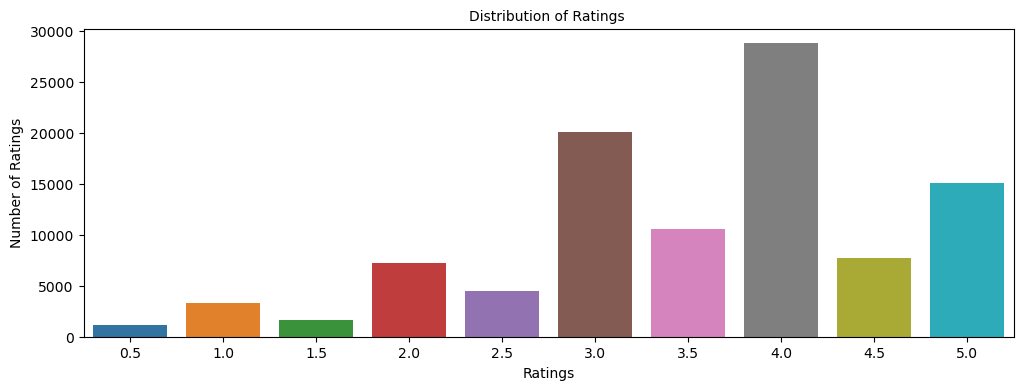

In [10]:
plt.figure(figsize = (12, 4))

sns.countplot(x = "rating", data = rating)

plt.tick_params(labelsize = 10)
plt.title("Distribution of Ratings ", fontsize = 10)
plt.xlabel("Ratings", fontsize = 10)
plt.ylabel("Number of Ratings", fontsize = 10)
plt.show()

Rating 4.0 has been the most famous rating, followed by 3.0 and 5.0.

Most of the Ratings fall in the range of [3, 5] or we can say [3, 4.5]. and very few movies are rated less than 3.0

### **What is the total number of unique users and unique movies?**


In [11]:
# Finding number of unique users
rating['userId'].nunique()

671

##### There are a total of **671** Unique Users in the entire dataset 

In [12]:
# Finding number of unique movies

rating['movieId'].nunique()

9066

##### There are a total of **9066** Unique movies in the entire dataset 

### Are there any movies that has been interacted more than once by the same user?

In [13]:
rating.groupby(['userId', 'movieId']).count()

rating
userId movieId        
1      31            1
       1029          1
       1061          1
       1129          1
       1172          1
...                ...
671    6268          1
       6269          1
       6365          1
       6385          1
       6565          1

[100004 rows x 1 columns]

In [14]:
rating.groupby(['userId', 'movieId']).count()['rating'].sum()

100004

The sum(1,00,004) is equal to the total number of rows in the dataset, which means there are no such cases where a customer review(interacted) the same movie twice.

##### Most Interacted Movie:

In [15]:
rating['movieId'].value_counts()

movieId
356       341
296       324
318       311
593       304
260       291
         ... 
98604       1
103659      1
104419      1
115927      1
6425        1
Name: count, Length: 9066, dtype: int64

Movie with the movieId-356 has been reviewed the most (341 times!).

##### Ratings distribution

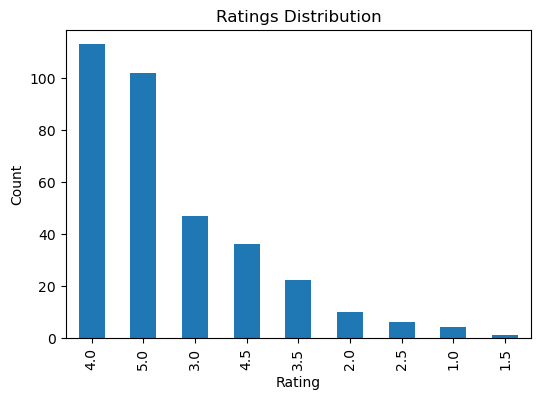

In [16]:
# Plotting distributions of ratings for 341 interactions with movieid 356 
plt.figure(figsize=(6,4))
rating[rating['movieId'] == 356]['rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title("Ratings Distribution")
plt.show()

In [17]:
rating['userId'].value_counts()

userId
547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: count, Length: 671, dtype: int64

User with the userId-547 has the reviewd the most number of moview(2391 movies in total!)

In [18]:
count_interactions = rating.groupby('userId').count()['movieId']
count_interactions

userId
1       20
2       76
3       51
4      204
5      100
      ... 
667     68
668     20
669     37
670     31
671    115
Name: movieId, Length: 671, dtype: int64

##### User-Movie Interaction

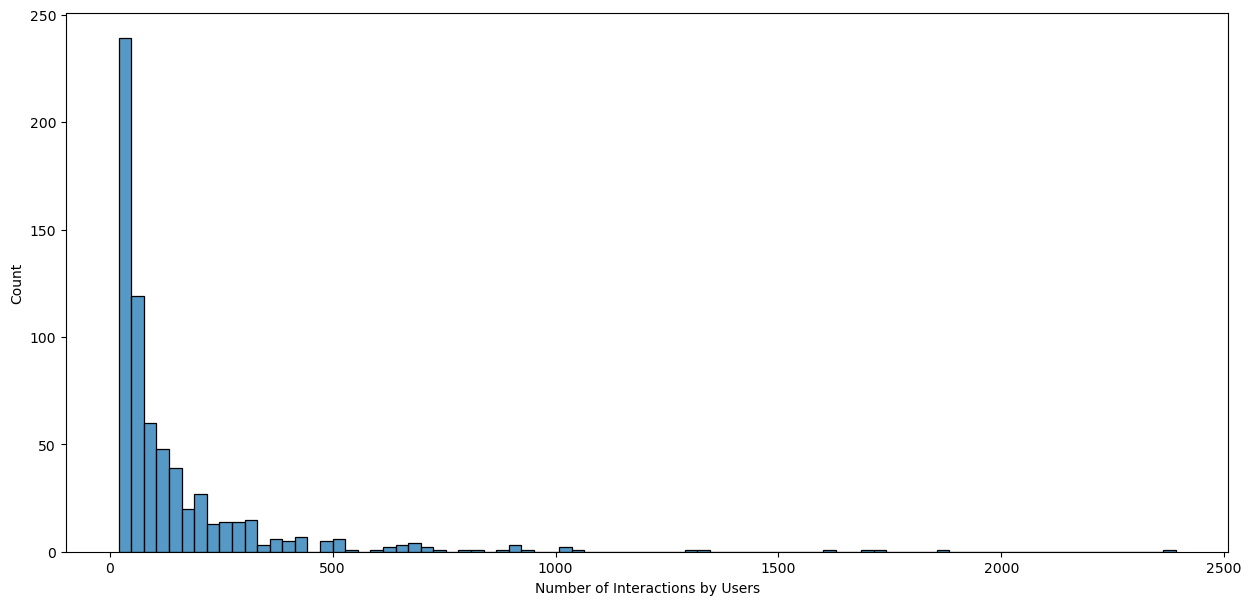

In [19]:
plt.figure(figsize=(15,7))
# Remove _______ and complete the code

sns.histplot(data = count_interactions, )

plt.xlabel('Number of Interactions by Users')

plt.show()

In [20]:
%store rating

Stored 'rating' (DataFrame)
